In [1]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
dataSetPath = r"..\1_DataSets\3_framingham.csv"

dataset = pd.read_csv(dataSetPath)
dataSetName = os.path.basename(dataSetPath)


 
print(f"{dataSetName} Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"{dataSetName} Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in dataset File: {totalNumberOfRowInActualDataset}")

3_framingham.csv Columns: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
****************************
3_framingham.csv Shape: (4240, 16)
****************************
Total Rows in dataset File: 4240


In [3]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Pre-Processing (Removing Nan and  Duplicates)

In [6]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")


Dataset Shape after removing duplcates: (4240, 16)
****************************
Remaining Rows in Dataset: 4240
****************************
Total Duplicates: 0
Remaining Rows in Dataset: 3658
****************************
Removed Number of rows containing Null Values: 582


# Class Distribution check (imbalanced or balanced)

Target Class Distribution:
TenYearCHD
0    3101
1     557
Name: count, dtype: int64


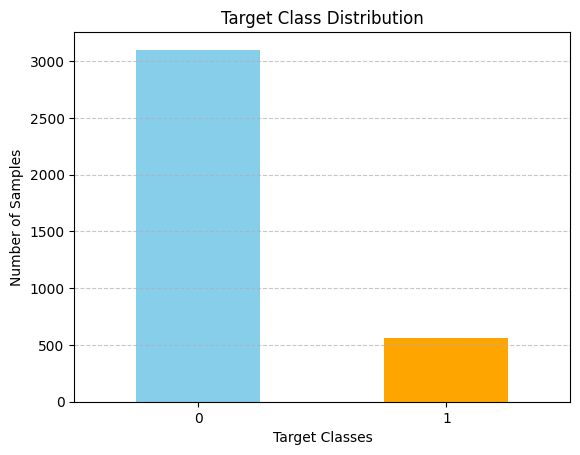

In [7]:
# Target Classes Distribution 
target_column = cleanedDataset.columns.to_list()[-1]

# Check the distribution of each target class
class_distribution = cleanedDataset[target_column].value_counts()

# Print the class distribution
print("Target Class Distribution:")
print(class_distribution)
  
# Bar plot of class distribution
class_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Target Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Label Encoding (Changing Categorical to Numerical)

In [8]:
labelEncodingAlgorithmFromScienceKit = LabelEncoder()

for col in cleanedDataset.select_dtypes(include=['object', 'category', 'bool', 'datetime']).columns:
    cleanedDataset[col] = cleanedDataset[col].str.lower()
    cleanedDataset[col] = cleanedDataset[col].str.strip()
    cleanedDataset[col] = labelEncodingAlgorithmFromScienceKit.fit_transform(cleanedDataset[col])
 

cleanedDataset.shape

cleanedDataset.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Correlation Matrix (Pearson, Spearman-Rank)

In [9]:
# Calculate Pearson correlation
pearson_corr = cleanedDataset.corr(method='pearson')

# Calculate Spearman correlation
spearman_corr = cleanedDataset.corr(method='spearman')

print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)


Pearson Correlation:
                      male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.024412   0.017729       0.206114    0.330322   
age             -0.024412  1.000000  -0.159499      -0.210771   -0.189295   
education        0.017729 -0.159499   1.000000       0.025251    0.013790   
currentSmoker    0.206114 -0.210771   0.025251       1.000000    0.773913   
cigsPerDay       0.330322 -0.189295   0.013790       0.773913    1.000000   
BPMeds          -0.052124  0.134732  -0.013739      -0.051923   -0.046504   
prevalentStroke -0.002312  0.050893  -0.030386      -0.038150   -0.036286   
prevalentHyp     0.001424  0.306239  -0.078828      -0.108078   -0.070460   
diabetes         0.013819  0.109092  -0.039627      -0.041849   -0.036961   
totChol         -0.070321  0.268252  -0.013522      -0.051034   -0.030400   
sysBP           -0.045358  0.388267  -0.124360      -0.134428   -0.094781   
diaBP            0.051872  0.208283  -0.058059      -0

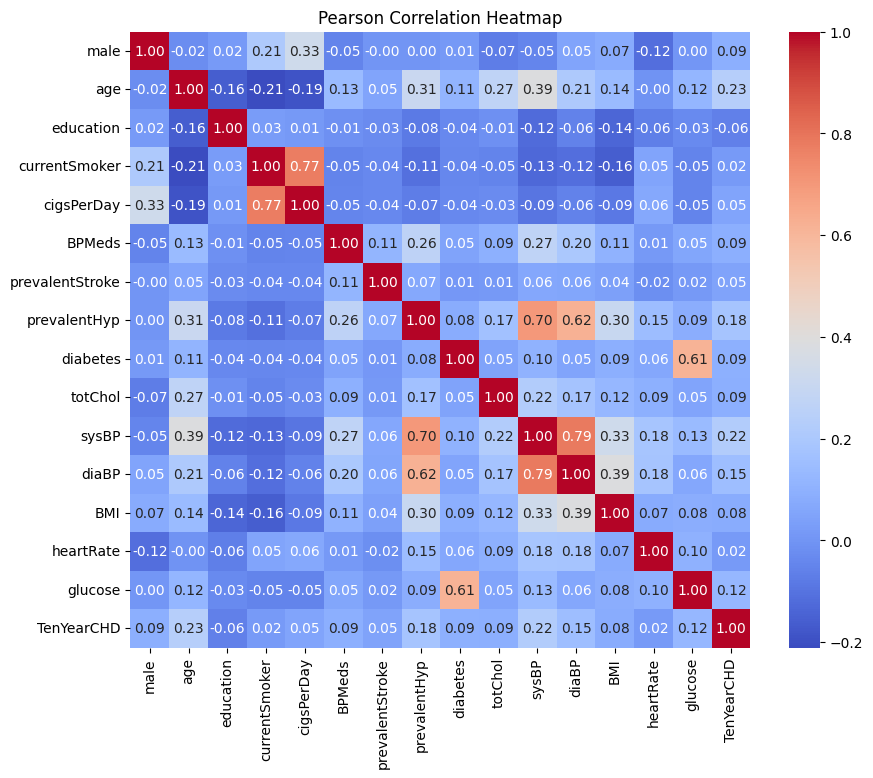

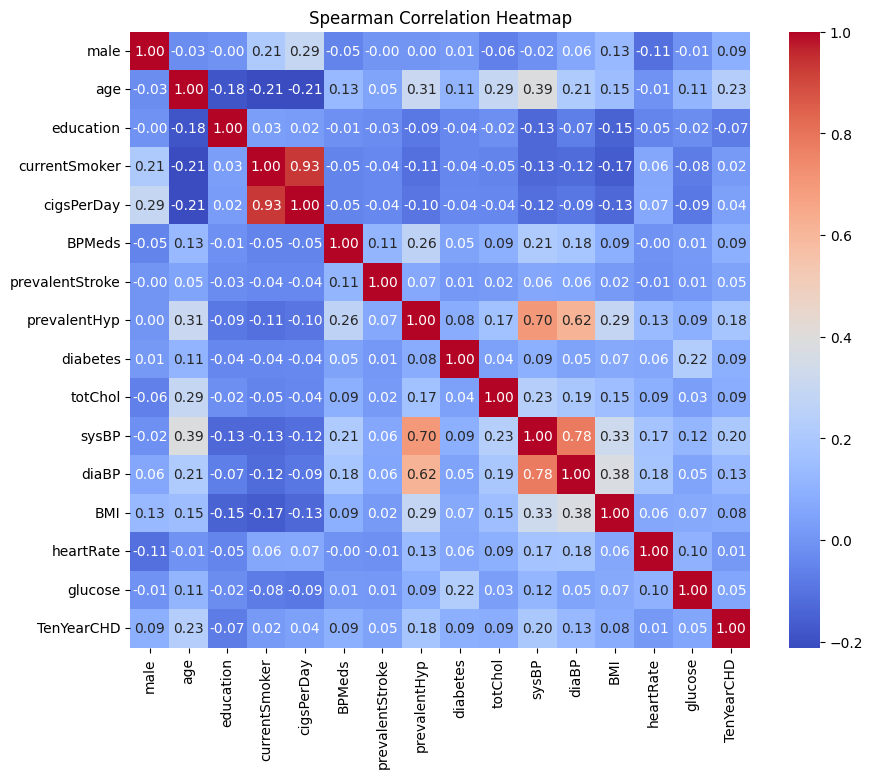

In [10]:

# Plot Pearson correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Plot Spearman correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()